<a href="https://colab.research.google.com/github/saigowtham627/Fundementals/blob/main/Numpy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numpy vs Python Lists**

In [ ]:
import numpy as np

In [ ]:
import time

#Speed
#Creating 2 lists a and b
a = [i for i in range(0,10000000)] #Numbers from 0 to 1 crore
b = [i for i in range(10000000,20000000)]

c = [] #Creating an empty list, to store the sum of elements in the list

start = time.time() #Capturing time at the start of operation

for i in range(len(a)):
  c.append(a[i]+b[i])

stop = time.time() #Measuring time at end of operation

print("Total time taken:",stop-start)

Total time taken: 1.840576171875


In [ ]:
s = [1,2,3,]
t = [9,0,2]

print(s+t) #This performs list addition, but not element wise addition

[1, 2, 3, 9, 0, 2]


In [ ]:
#Checking the speed by using Numpy array
a = np.arange(0,10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b #In numpy array we dont have to perform the loop, here automatic addition happens
stop = time.time()

print("Time taken:",stop-start)


Time taken: 0.020111560821533203


In [ ]:
#Calculating the speed up
1.840576171875 / 0.020111560821533203 #91 times spped up

91.51831566967779

**Reason for the speed up**

Numpy uses C type array which is :
>A static array, its size does not change

>It is a NOT a referential array, We store the actual value instead of its address

Problem with the Python Lists:

>It is dynamic in nature, its size changes everytime after a new element adds in it and this creates an overhead

>Its is a referential array, here we store the address of the result.

In [ ]:
#Memory
import sys

a = [i for i in range(0,10000000)] #Python list

#By using sys we can measure the size of any variable/data type

sys.getsizeof(a) #In BYTES


89095160

In [ ]:
#Using numpy array
b = np.arange(0,10000000, dtype=np.int32) #By specifying the integer type, we can control the space occupied

sys.getsizeof(b)

b[-1] #Minimum of int32 should be there to store the numbers upto 1 crore


9999999

**One advantage of python list, over numpy array is, List can store non homogenous data types**

#Advanced Indexing

In [ ]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
#fetching 5
a[1,1]

5

In [ ]:
#Fetching 5,6,9,10
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [ ]:
#Fancy Indexing
#EX:Fetch rows of 1,3 and 4(We dont have any pattern here)
#When we are not able to form any patternns, we can do Fancy Indexing
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
b = np.arange(24).reshape(6,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
#fetch 1st, 3rd,4th and 6th rows
b[[0,2,3,5],:]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [ ]:
#Fetch 0th,2nd and 3rd column
b[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [ ]:
#Boolean Indexing
c = np.random.randint(1,100,24).reshape(6,4) #We need 24 numbers from 1 to 100.
print(c)

[[ 6 69 45 99]
 [92 93 23 71]
 [ 1 34 26 13]
 [25 37 45 24]
 [11 44 28 87]
 [79 70 73 27]]


In [ ]:
#Find all numbers greater than 50
c > 50 #Generates a boolean array

"""And the best part is that, we can use the mask produced and apepnd it on the array
  and generate those numbers only"""

c[c>50]

array([69, 99, 92, 93, 71, 87, 79, 70, 73])

In [ ]:
#Find out even numbers
c[c%2==0]

array([ 6, 92, 34, 26, 24, 44, 28, 70])

In [ ]:
#Find all the numbers which are greater than 50 and are also even
#First write the logic, Generate the mask and then place it on the array

#If 2 or more values are used, each of them must be placed in ()

"""AND is logical "AND" but here we have to use Bitwise operators so we have to use &"""

c[(c > 50) & (c%2==0)] #We must use symbol and &, but not and as a word



array([92, 70])

In [ ]:
#Find the numbers which are divisible by 7
c[c%7!=0]

"""OR"""

c[~(c%7==0)]

array([ 6, 69, 45, 99, 92, 93, 23, 71,  1, 34, 26, 13, 25, 37, 45, 24, 11,
       44, 87, 79, 73, 27])

#Broadcasting

**The term broadcasting describes how Numpy treats arrays with different shapes during arthematic operations**

**The smaller array is "BROADCASTED" across the larger array so that they have compatible shapes**

In [ ]:
a = np.arange(0,6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)
#Element wise addition operation between 2 arrays

[[0 1 2]
 [3 4 5]]
xxxxxxxxxx
[[ 6  7  8]
 [ 9 10 11]]
xxxxxxxxxx
[[ 6  8 10]
 [12 14 16]]


In [ ]:
a = np.arange(0,6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

#[0 1 2] being a row vector is added to each row of the matrix b

[[0 1 2]
 [3 4 5]]
xxxxxxxxxx
[[0 1 2]]
xxxxxxxxxx
[[0 2 4]
 [3 5 7]]


#Broadcasting rules

**Rule 1:Make the array to have the same number of dimensions.**

>If the NUMBER OF DIMENSIONS of 2 arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

Ex: Let there be 2 vectors of size (2,3) and (3). Now we should add 1 to the head of (3), which becomes (1,3)

**Rule 2: Make each dimension of the 2 arrays the same size**
>If the sizes of each dimension of the 2 arrays do not match, dimensions with size 1 are streched to the size of the other array.

>If there is a dimension whose size is not 1 in either of the 2 arrays, it cannot be broadcasted, and an error is raised.


In [ ]:
a = np.arange(0,12).reshape(4,3)
b = np.arange(3)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
xxxxxxxxxx
[0 1 2]
xxxxxxxxxx
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(0,12).reshape(3,4)
b = np.arange(3)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
xxxxxxxxxx
[0 1 2]
xxxxxxxxxx


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[[0 1 2]]
xxxxxxxxxx
[[0]
 [1]
 [2]]
xxxxxxxxxx
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[[0 1 2]]
xxxxxxxxxx
[[0]
 [1]
 [2]
 [3]]
xxxxxxxxxx
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
#Shape ->(1,1)
b = np.arange(4).reshape(2,2)
#Shape ->(2,2)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[1]
xxxxxxxxxx
[[0 1]
 [2 3]]
xxxxxxxxxx
[[1 2]
 [3 4]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
xxxxxxxxxx
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
xxxxxxxxxx


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print("xxxxxxxxxx")
print(b)
print("xxxxxxxxxx")
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
xxxxxxxxxx
[[0 1]
 [2 3]]
xxxxxxxxxx


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

#Working with mathematical formulas

In [ ]:
a = np.arange(1,10)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.sum(a)

45

In [ ]:
np.product(a)

362880

In [ ]:
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
np.tanh(a)

array([0.76159416, 0.96402758, 0.99505475, 0.9993293 , 0.9999092 ,
       0.99998771, 0.99999834, 0.99999977, 0.99999997])

In [ ]:
#If the functions are not available in built-in numpy , we can define them and use them

def sigmoid(array): #We have to pass an array
  return 1/(1+np.exp(-(array)))

a = np.arange(10)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [ ]:
#Mean Square error
#We need 2 arrays namely actual and Predicted

actual_ = np.random.randint(1,50,25)
predicted_ = np.random.randint(1,50,25)

def mse(actual,predicted):
  print(int((1/len(actual))*(np.sum((actual-predicted)**2))))

mse(actual = actual_,predicted = predicted_)

339


In [ ]:
#Binary Cross Entropy
actual_ = np.random.randint(0,2,25)
predicted_ = np.random.randint(0,2,25)


0


#Working with missing values

In [ ]:
a = np.array([1,2,3,4,np.nan,5,6])
a

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [ ]:
#Get only the integer values
np.isnan(a) #Generates a bool mask

array([False, False, False, False,  True, False, False])

In [ ]:
a[np.isnan(a)] #Gives nan values

array([nan])

In [ ]:
a[~(np.isnan(a))] #Gives all the not-null values

array([1., 2., 3., 4., 5., 6.])

#Plotting graphs

In [ ]:
import matplotlib.pyplot as plt

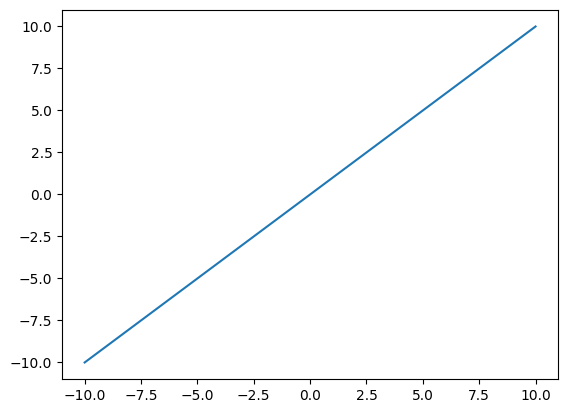

In [ ]:
#x=y
#Straight line through Origin
#Generate values of x
x = np.linspace(-10,10,100)
y = x

plt.plot(x,y) #x and y must be of same size

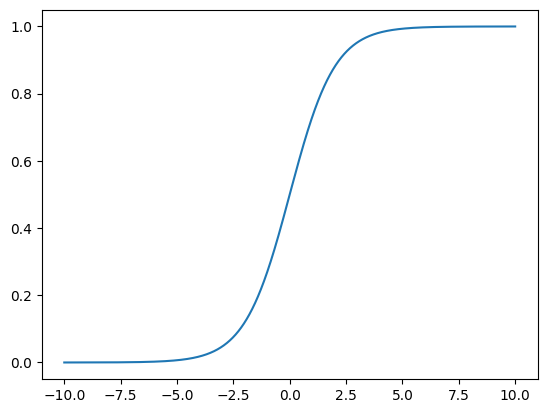

In [ ]:
def sigmoid(array): #We have to pass an array
  return 1/(1+np.exp(-(array)))

a = np.linspace(-10,10,100000)

b = sigmoid(a)

plt.plot(a,b)

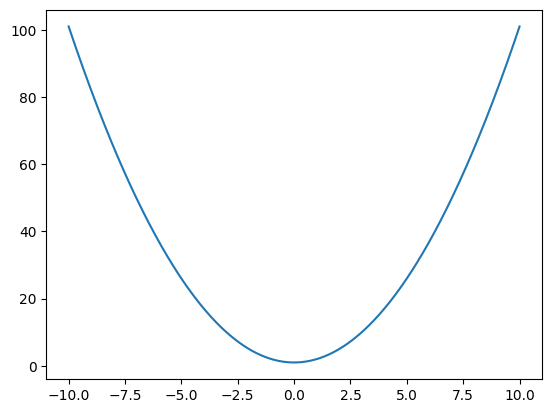

In [ ]:
#y = x^2, Parabola

x = np.linspace(-10,10,500)
y = x**2
# print(x)
# print(y)

plt.plot(x,y)

<ipython-input-202-942175a9c084>:4: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


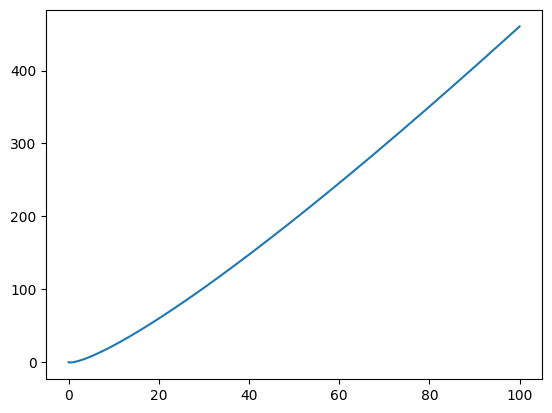

In [ ]:
#y = sin(x)

x = np.linspace(-100,100,10000)
y = x*np.log(x)

plt.plot(x,y)